## Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Lets load our data into the notebook.

In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

**Data import successful**

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


**Living Area**

In [5]:
df_train.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

### Feature Engineering

**Feature names and staistics for our target variable which is the sale price.**

In [6]:
for col in df_train.columns:
    print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


### Lets visualize ECDF plot

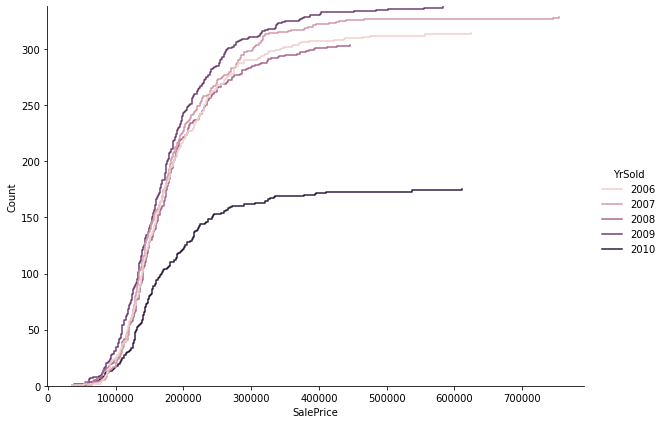

In [7]:
sns.displot(
  data=df_train,
  x="SalePrice",
  kind="ecdf",
  hue="YrSold",
  height=6,
  aspect=1.4,
  stat="count"
)

**Lets see what type of residential area is preffered most by buyers and to see which type of zone, house type is most preferred**

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

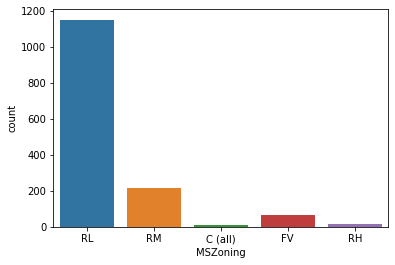

In [8]:
sns.countplot(x='MSZoning', data=df_train)

**Lets see the most preferred house type**

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

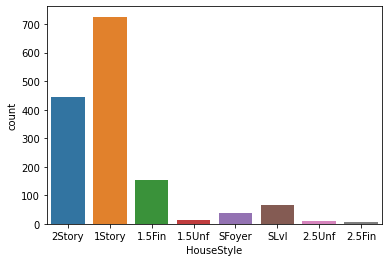

In [9]:
sns.countplot(x='HouseStyle', data=df_train)

**Lets see the years the houses were built and their respective statistics**

In [10]:
df_train['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

**Now lets see the number of rooms preferred in a house over the years**

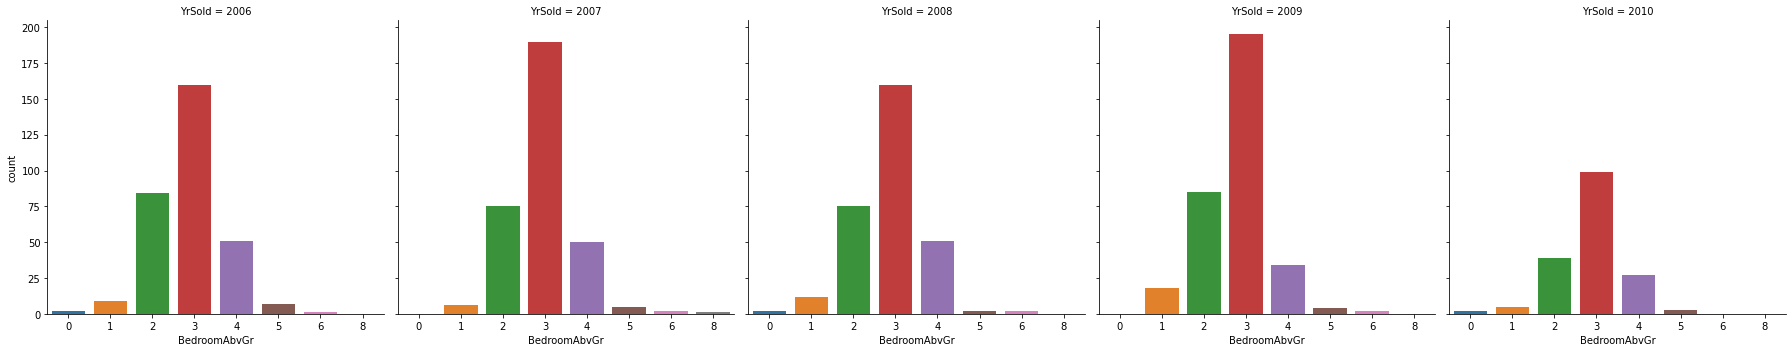

In [11]:
sns.catplot(x= 'BedroomAbvGr' , kind= 'count', data = df_train , col = 'YrSold')

**From the above cell we can easily see that 3 Bedrooms houses are preferred the most.**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

**Dealing with null values.**

In [13]:
def find_nan_cols(df):
    null = df.isnull().sum()
    missing_df = pd.concat([null], axis=1, keys=['nancount'])

    return missing_df[(missing_df.nancount > 0)]

In [14]:
df_train= df_train.fillna(method='pad')
df_test = df_test.fillna(method='pad')
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

229
553


In [15]:
train_null = find_nan_cols(df_train)
test_null = find_nan_cols(df_test)
print(train_null)
print(test_null)

             nancount
Alley              21
FireplaceQu         1
PoolQC            197
Fence               5
MiscFeature         5
             nancount
Alley              36
FireplaceQu         2
PoolQC            514
MiscFeature         1


**Removing unnecessary columns with null values.**

In [16]:
df_train.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 1, inplace= True)
df_test.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], 1, inplace= True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [17]:
print('Null values in train_df:',df_train.isnull().sum().sum())
print('Null values in test_df:',df_test.isnull().sum().sum())

Null values in train_df: 0
Null values in test_df: 0


### Model Training

In [18]:
y = df_train.SalePrice
X = df_train.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
x = df_test.select_dtypes(exclude=['object'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Decision tree model

In [20]:
model_1 = DecisionTreeRegressor()  
model_1.fit(X_train, y_train) 
DTR_pred = model_1.predict(X_test)
print ("Decision Tree Error :", mean_absolute_error(y_test, DTR_pred))

Decision Tree Error : 26799.865753424656


#### Random Forest model

In [21]:
model_2 = RandomForestRegressor(n_estimators=100, max_depth=10)
model_2.fit(X_train, y_train )
RF_pred = model_2.predict(X_test)
print("Random Forest Error:", mean_absolute_error(y_test, RF_pred))

Random Forest Error: 19133.899263762825


#### Logistic Regression Model

In [22]:
model_3 = LogisticRegression()
model_3 = model_3.fit (X_train,y_train)
LR_pred = model_3.predict(X_test)
print("Logistic Regression Error:", mean_absolute_error(y_test, LR_pred))

Logistic Regression Error: 40849.74246575342


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Model Prediction

In [23]:
RF_pred = model_2.predict(x)
RF_pred

array([128717.18240159, 155275.743983  , 179962.98462946, ...,
       166377.13838739, 114421.88899932, 227332.64426648])

In [24]:
Final_pred = pd.DataFrame(RF_pred)

In [25]:
pred=pd.DataFrame(Final_pred)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],Final_pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('./submission.csv',index=False)